# Normal Distribution
- Normal distribution in Machine Learning refers to a bell-shaped, symmetric data distribution where most values cluster around the mean.

- What it looks like:

- Centered at the mean (μ)

- Spread controlled by standard deviation (σ)

- Left and right sides are mirror images

## Key properties:

- Mean = Median = Mode

- Most data lies close to the mean

- Follows the 68–95–99.7 rule:

- 68% within ±1σ

- 95% within ±2σ

- 99.7% within ±3σ

## Why normal distribution is important in ML:

- Many algorithms assume normality
(e.g., Linear Regression, Naive Bayes, LDA)

- Faster and more stable training

- Works well with gradient-based methods

- Helps with statistical interpretation

- Improves model performance after transformations

## Common ML uses:

- Feature scaling (Standardization)
- Noise modeling

- Error assumptions in regression

- Probability estimation

## Simple example:

- Heights of people or measurement errors often follow a normal distribution.

👉 In short:
A normal distribution helps ML models learn patterns more efficiently because data is well-balanced and predictable.

# Skewness
- Skewness in data means the data is not symmetric and is tilted to one side.

- Simple meaning:

- Skewness shows which side has a longer tail in a data distribution.

## Types of skewness:

## Positive skewness (Right-skewed)

- Tail is longer on the right side

- Most values are small

- Example: income, house prices

## Negative skewness (Left-skewed)

- Tail is longer on the left side

- Most values are large

- Example: exam scores where most students score high

## Why skewness matters in ML:

- Many ML models work better with less skewed data

- Skewed data can affect:

- mean and variance

- model accuracy

## How to reduce skewness:

- Log transformation

- Square root transformation

- Box-Cox transformation

## In one line:
👉 Skewness tells us whether data is pulled more to the left or right.

# Mathematical Transformation
- Mathematical transformations in Machine Learning are used to change data into a form that models can understand and learn from more effectively.

## Simple explanation with examples:

## Scaling

- Adjusts feature values to a similar range

Examples:

## Min-Max Scaling:

𝑥
′
=
𝑥
−
𝑥
𝑚
𝑖
𝑛
𝑥
𝑚
𝑎
𝑥
−
𝑥
𝑚
𝑖
𝑛
x
′
=
x
max
	​

−x
min
	​

x−x
min
	​

	​


## Standardization:

𝑥
′
=
𝑥
−
𝜇
𝜎
x
′
=
σ
x−μ
	​


## Log Transformation

Reduces skewness in data

Formula:

𝑥
′
=
log
⁡
(
𝑥
+
1
)
x
′
=log(x+1)

## Normalization

Scales data to unit length

Formula:

𝑥
′
=
𝑥
∥
𝑥
∥
x
′
=
∥x∥
x
	​


- Encoding (for categorical data)

- Converts categories to numbers

- Example: One-Hot Encoding

## Polynomial Transformation

Adds higher-order features

Example:

𝑥
→
𝑥
,
𝑥
2
,
𝑥
3
x→x,x
2
,x
3
## Why they are used:

- Improve model performance

- Speed up training

- Help models detect patterns

- Reduce bias from scale differences



# Function Transformer

In [3]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from  sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [4]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [6]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

/var/folders/by/1y9dyrg52t3_69n_jld52myh0000gn/T/ipykernel_34605/718055844.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


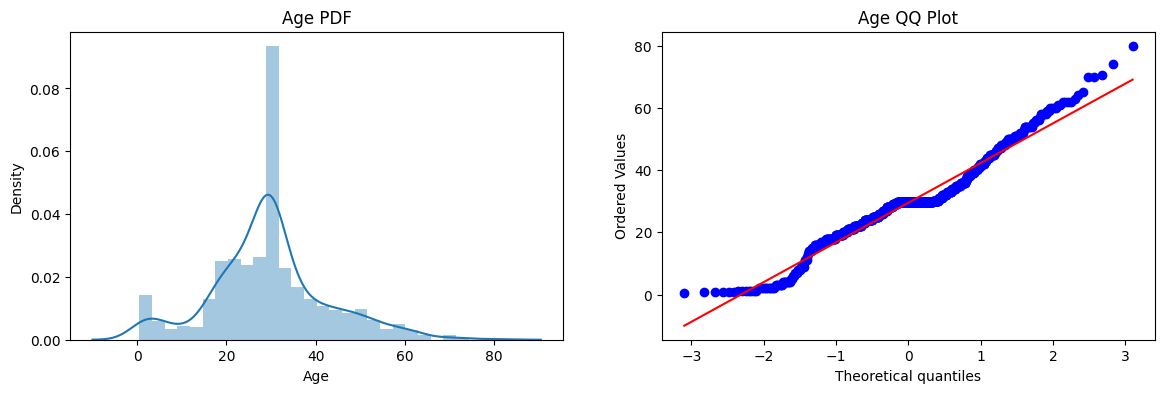

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/var/folders/by/1y9dyrg52t3_69n_jld52myh0000gn/T/ipykernel_34605/966339987.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


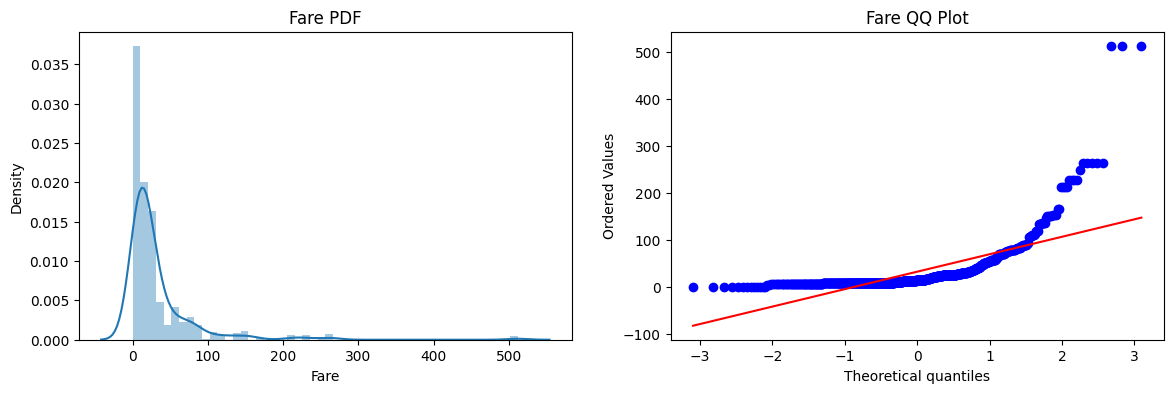

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()


In [10]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)

print("Accuracy LR", accuracy_score(y_test,y_pred1))
print("Accuracy DT", accuracy_score(y_test,y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6871508379888268


In [15]:
trf = FunctionTransformer(func = np.log1p)  ##-----> Log Transform


In [16]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [18]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [20]:
clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred1 = clf1.predict(x_test_transformed)
y_pred2 = clf2.predict(x_test_transformed)

print("Accuracy LR", accuracy_score(y_test,y_pred1))
print("Accuracy DT", accuracy_score(y_test,y_pred2))


Accuracy LR 0.6815642458100558
Accuracy DT 0.6703910614525139


In [22]:
## Here the accuracy score of the Logistic regression has increased .
## Some of the models could not be affected by the transformation so DT has not changes.


In [26]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588389513108613


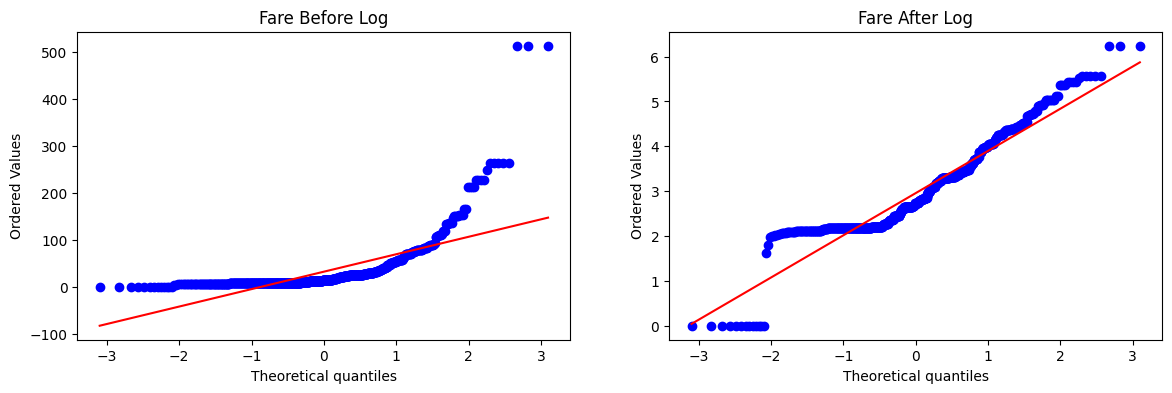

In [28]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()



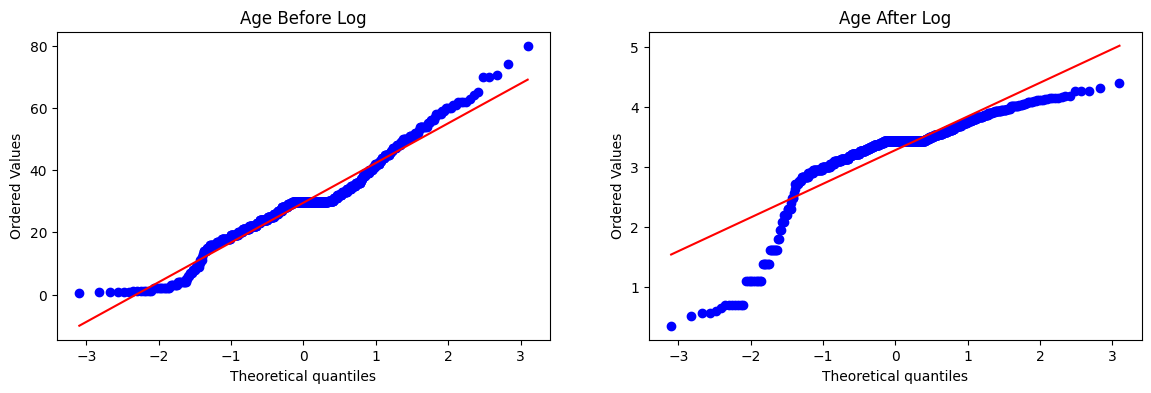

In [30]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [35]:
## we can do the Transformation by applying these only to Fare column BUt the accuracy wont change much
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [36]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
    
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))


Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [38]:
x_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=10)))


LR 0.6712609238451936
DT 0.6644319600499375


In [39]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6431335830212235


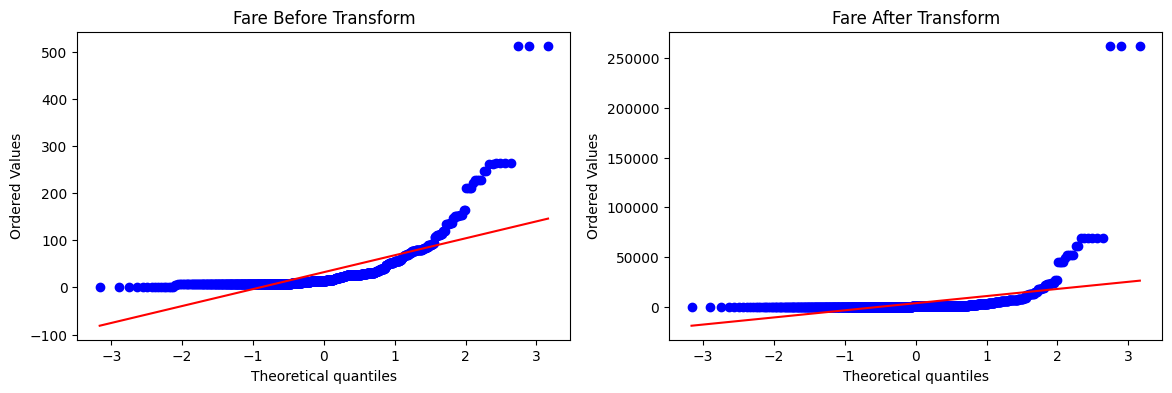

In [43]:
apply_transform(lambda x:x**2)   #----> square Transform


Accuracy 0.6589013732833957


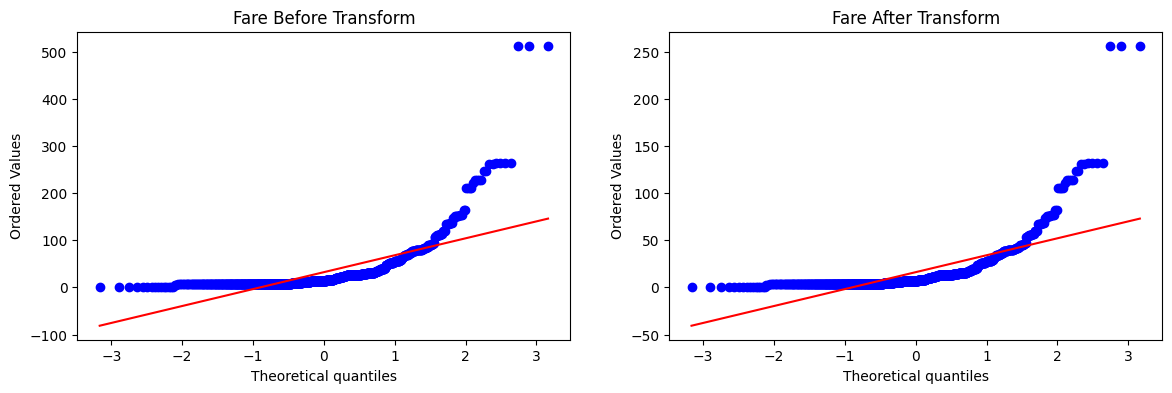

In [44]:
apply_transform(lambda x:x**1/2)   #----> Square Root Transform